# **Wstęp do Data Science i ML**: Preprocessing i oczyszczanie danych

Prowadzące: Martyna Żur, Ewa Radwan

Data: 04.11.2025



---



#### **Co to jest preprocessing danych?**

Preprocessing danych to pierwszy krok w pracy z każdym zbiorem danych (tzw. datasetem).
Oznacza przygotowanie surowych danych do dalszej analizy lub budowania modelu uczenia maszynowego.

#### **Dlaczego to takie ważne?**

Dane z prawdziwego świata (np. medyczne, biologiczne, społeczne) prawie nigdy nie są idealne.
Często zawierają błędy, puste miejsca, duplikaty lub różne sposoby zapisywania tych samych rzeczy.

Na przykład:

* Jedna osoba wpisała „Resistant”, a inna „resistant” — komputer uzna, że to dwie różne wartości.

* Dla niektórych bakterii nie wykonano testu na dany antybiotyk — więc mamy brakującą wartość.

* Czasem dane się powtarzają (duplikaty) lub mają dziwne wartości (np. liczby bardzo duże lub nierealne).

Takie błędy utrudniają analizę i mogą prowadzić do złych wyników modeli.



---



In [1]:
import pandas as pd
import numpy as np



---

## **Poznajmy nasze dane!**

Dane: [Multi-Resistance Antibiotic Susceptibility](https://www.kaggle.com/datasets/adilimadeddinehosni/multi-resistance-antibiotic-susceptibility)

Ten set składa się z 27 kolumn - nie wszystkie będą nas interesować (dlatego zrobimy sobie subset!)

In [2]:
df = pd.read_csv('data.csv')
df.head()

,ID,Name,Email,Address,age/gender,Souches,Diabetes,Hypertension,Hospital_before,Infection_Freq,...,AN,Acide nalidixique,ofx,CIP,C,Co-trimoxazole,Furanes,colistine,Collection_Date,Notes
0,S290,Elizabeth Lawrence,elizabeth.lawrence@example.com,"6350 Robinson Loaf Apt. 447, Paulfurt, RI 30252",37/F,S290 Escherichia coli,No,No,No,0.0,...,S,S,S,S,R,S,S,S,5 Fev 2025,Patient had fever??
1,S291,Tina Sanders,tina.sanders@example.com,"78594 Galloway Port Suite 762, South Tanyatown...",29/F,S291 Morganella morganii,True,No,No,3.0,...,S,S,S,S,S,S,S,S,08/05/2021,تم العلاج
2,S292,Erin Cooke,erin.cooke@example.com,"76661 Isaiah Manors, North Benjamin, HI 85195",77/F,S292 Proteus mirabilis,True,No,No,3.0,...,S,S,S,R,R,S,S,S,01/05/2022,NADA
3,S293,Mrs. Sharon Watson,mrs..sharon.watson@example.com,"1670 Thompson Way Apt. 520, Andrewbury, IL 11534",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-05,PACIENTO ENFERMO
4,S294,Erika Stewart,erika.stewart@example.com,"76838 Patrick Green Suite 538, Torresmouth, ME...",13/F,S294 Escherichia coli,No,Yes,No,1.0,...,R,S,S,S,S,S,S,S,error,NADA


***Zadanie 1:***

Ustaw ID jako indeks.

In [3]:
df.set_index('ID', inplace=True)
df.head()

,Name,Email,Address,age/gender,Souches,Diabetes,Hypertension,Hospital_before,Infection_Freq,AMX/AMP,...,AN,Acide nalidixique,ofx,CIP,C,Co-trimoxazole,Furanes,colistine,Collection_Date,Notes
ID,,,,,,,,,,,,,,,,,,,,,
S290,Elizabeth Lawrence,elizabeth.lawrence@example.com,"6350 Robinson Loaf Apt. 447, Paulfurt, RI 30252",37/F,S290 Escherichia coli,No,No,No,0.0,R,...,S,S,S,S,R,S,S,S,5 Fev 2025,Patient had fever??
S291,Tina Sanders,tina.sanders@example.com,"78594 Galloway Port Suite 762, South Tanyatown...",29/F,S291 Morganella morganii,True,No,No,3.0,S,...,S,S,S,S,S,S,S,S,08/05/2021,تم العلاج
S292,Erin Cooke,erin.cooke@example.com,"76661 Isaiah Manors, North Benjamin, HI 85195",77/F,S292 Proteus mirabilis,True,No,No,3.0,S,...,S,S,S,R,R,S,S,S,01/05/2022,NADA
S293,Mrs. Sharon Watson,mrs..sharon.watson@example.com,"1670 Thompson Way Apt. 520, Andrewbury, IL 11534",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-05,PACIENTO ENFERMO
S294,Erika Stewart,erika.stewart@example.com,"76838 Patrick Green Suite 538, Torresmouth, ME...",13/F,S294 Escherichia coli,No,Yes,No,1.0,S,...,R,S,S,S,S,S,S,S,error,NADA


####**Sprawdźmy informacje o kolumnach:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10710 entries, S290 to S10999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               10710 non-null  object
 1   Email              10710 non-null  object
 2   Address            10710 non-null  object
 3   age/gender         10089 non-null  object
 4   Souches            10070 non-null  object
 5   Diabetes           10075 non-null  object
 6   Hypertension       10080 non-null  object
 7   Hospital_before    10073 non-null  object
 8   Infection_Freq     10071 non-null  object
 9   AMX/AMP            10052 non-null  object
 10  AMC                10078 non-null  object
 11  CZ                 10082 non-null  object
 12  FOX                10085 non-null  object
 13  CTX/CRO            10086 non-null  object
 14  IPM                10077 non-null  object
 15  GEN                10067 non-null  object
 16  AN                 10082 non-null  object

In [5]:
df.describe()

,Name,Email,Address,age/gender,Souches,Diabetes,Hypertension,Hospital_before,Infection_Freq,AMX/AMP,...,AN,Acide nalidixique,ofx,CIP,C,Co-trimoxazole,Furanes,colistine,Collection_Date,Notes
count,10710,10710,10710,10089,10070,10075,10080,10073,10071,10052,...,10082,10088,10092,10077,10081,10070,10073,10074,10041,10598
unique,10005,10005,10710,184,9298,4,4,4,8,8,...,8,8,8,8,8,8,8,8,13,9
top,William Smith,william.smith@example.com,"6350 Robinson Loaf Apt. 447, Paulfurt, RI 30252",40/F,?,No,No,No,2.0,R,...,S,S,S,S,S,S,S,S,2024-12-31,see file
freq,6,6,1,167,63,7883,7470,7008,2966,5634,...,7785,8281,8292,8240,8297,8272,8370,8331,1461,1508


#### **Subset!**
Skoro już wiemy co się kryje w naszych danych, wybierzmy tylko te dane, które będą interesujące dla naszej analizy.

Chcemy by nasz nowy dataframe składał się z takich kolumn jak:
* age/gender - to chcemy rozdzielić na dwie osobne kolumny
* Diabetes
* Hypertension
* Infection_Freq
* Kolmny zawierające informacje o odporności na dany antybiotyk z grupy Quinolones: Acide nalidixique (Nalidixic Acid),
ofx (Ofloxacin), CIP (Ciprofloxacin)

***Zadanie 2:***  

Stwórz subset składający się z kolumn: "age/gender", "Diabetes", "Hypertension", "Infection_Freq", "Acide nalidixique", "ofx", "CIP"

In [6]:
sub_cols = ["age/gender", "Diabetes", "Hypertension", "Infection_Freq", "Acide nalidixique", "ofx", "CIP"]
df[sub_cols]

,age/gender,Diabetes,Hypertension,Infection_Freq,Acide nalidixique,ofx,CIP
ID,,,,,,,
S290,37/F,No,No,0.0,S,S,S
S291,29/F,True,No,3.0,S,S,S
S292,77/F,True,No,3.0,S,S,R
S293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S294,13/F,No,Yes,1.0,S,S,S
...,...,...,...,...,...,...,...
S10995,17/M,No,No,3.0,S,S,S
S10996,20/F,True,No,3.0,S,S,S
S10997,33/M,No,No,0.0,S,R,S


#### **Sprawdźmy czy część wierszy nie jest całkowicie pusta.**

In [7]:
df[sub_cols].isnull().all(axis=1).sum()

501

In [8]:
df2 = df[sub_cols].dropna(how="all")
df2.head()

,age/gender,Diabetes,Hypertension,Infection_Freq,Acide nalidixique,ofx,CIP
ID,,,,,,,
S290,37/F,No,No,0.0,S,S,S
S291,29/F,True,No,3.0,S,S,S
S292,77/F,True,No,3.0,S,S,R
S294,13/F,No,Yes,1.0,S,S,S
S295,57/M,True,No,3.0,S,S,S


***Zadanie 3:***

Rozdziel kolumnę "age/gender" na dwie osobne - "Age" i "Gender"

In [9]:
df2[["Age", "Gender"]] = df2["age/gender"].str.split('/', expand=True)
df2 = df2.drop(columns=["age/gender"])
df2.head()

,Diabetes,Hypertension,Infection_Freq,Acide nalidixique,ofx,CIP,Age,Gender
ID,,,,,,,,
S290,No,No,0.0,S,S,S,37,F
S291,True,No,3.0,S,S,S,29,F
S292,True,No,3.0,S,S,R,77,F
S294,No,Yes,1.0,S,S,S,13,F
S295,True,No,3.0,S,S,S,57,M


#### **Sprawdźmy jakie wartości występują w każdej z kolumn**
Chcemy się dowiedzieć jak oczyścić nasze dane, niekoniecznie wartości brakujące będą NaN

***Zadanie 4:*** Oczyść dane.

***a.*** Oczyść kolumny Diabetes i Hypertension - zastąp wartości inne niż "No"/"Yes" wartością "Unknown". Zmień "True" na "Yes"


In [10]:
df2["Diabetes"] = df2["Diabetes"].replace("True", "Yes")
df2.loc[~df2["Diabetes"].isin(["No", "Yes"]), "Diabetes"] = "Unknown"
df2["Diabetes"].value_counts()

Diabetes
No         7883
Yes        2064
Unknown     262
Name: count, dtype: int64

In [11]:
df2["Hypertension"] = df2["Hypertension"].replace("True", "Yes")
df2.loc[~df2["Hypertension"].isin(["No", "Yes"]), "Hypertension"] = "Unknown"
df2["Hypertension"].value_counts()

Hypertension
No         7470
Yes        2477
Unknown     262
Name: count, dtype: int64

***b.***  Oczyść kolumny ofx, Acide nalidixique, CIP  
* zmień "s", "r" i "i"/"Intermediate" na "S" i "R", "I" - gdzie S to Susceptible, R to Resistant, I to Intermediate
* resztę zmień na "Unknown"

In [12]:
def map_antibiotics(val):
    if isinstance(val, str):
        v = val.strip().lower()
        if v in ['s']: return 'S'
        elif v in ['r']: return 'R'
        elif v in ['i', "Intermediate"]: return 'I'
        else: return "Unknown"
    else:
        return "Unknown"

In [13]:
antibiotics_cols = ["ofx", "Acide nalidixique", "CIP"]

for col in antibiotics_cols:
    df2[col] = df2[col].apply(map_antibiotics)
    print(df2[col].value_counts())

ofx
S          8406
R          1381
Unknown     334
I            88
Name: count, dtype: int64
Acide nalidixique
S          8379
R          1388
Unknown     351
I            91
Name: count, dtype: int64
CIP
S          8331
R          1447
Unknown     348
I            83
Name: count, dtype: int64


***c.*** W kolumnie "Age" zmień wartości nienumeryczne na mediane.

W kolumnie "Gender" zmień wartości "NaN" i "None" na "Unknown"



In [14]:
df2["Age"] = pd.to_numeric(df2["Age"], errors='coerce')
median = df2["Age"].median()

df2["Age"] = df2["Age"].replace(np.NaN, median)
df2["Age"].isna().sum()

0

In [15]:
df2["Age"].dtype

dtype('float64')

In [16]:
print("NaN counts:", df2["Gender"].isna().sum())
print("Value counts:", df2["Gender"].value_counts())

NaN counts: 262
Value counts: Gender
F    7929
M    2018
Name: count, dtype: int64


In [17]:
df2["Gender"] = df2["Gender"].replace(np.NaN, "Unknown")
print("NaN counts:", df2["Gender"].isna().sum())
print("Value counts:", df2["Gender"].value_counts())

NaN counts: 0
Value counts: Gender
F          7929
M          2018
Unknown     262
Name: count, dtype: int64


***Zadanie 5:*** Zmapuj wartości tekstowe na liczbowe przy pomocy słownika.

In [18]:
gender_map = {'F': 0, 'M': 1, 'Unknown': 2}
df2["Gender"] =  df2["Gender"].map(gender_map)
df2["Gender"].value_counts()

Gender
0    7929
1    2018
2     262
Name: count, dtype: int64

### ***ZADANIE DODATKOWE***
Przeanalizuj czy osoby, które częściej chorują są bardziej odporne na analizowaną grupę antybiotyków.

In [19]:
print("CIP Unqiue values:", df2["CIP"].unique())
print("OFX Unqiue values:", df2["ofx"].unique())
print("Acide nalidixique Unqiue values:", df2["Acide nalidixique"].unique())

CIP Unqiue values: ['S' 'R' 'Unknown' 'I']
OFX Unqiue values: ['S' 'R' 'Unknown' 'I']
Acide nalidixique Unqiue values: ['S' 'R' 'Unknown' 'I']


In [20]:
print(df2["Infection_Freq"].unique())
UNKNOWN = 'Unknown'
df2["Infection_Freq"] = df2["Infection_Freq"].replace(np.nan, UNKNOWN).replace('unknown', UNKNOWN).replace('?', UNKNOWN).replace('error', UNKNOWN).replace('missing', UNKNOWN)
print(df2["Infection_Freq"].unique())

['0.0' '3.0' '1.0' '2.0' nan 'unknown' '?' 'error' 'missing']
['0.0' '3.0' '1.0' '2.0' 'Unknown']


In [21]:
df2['CIP High Resistance'] = df2["CIP"].apply(lambda val: 1 if val == 'R' else 0)
df2['ofx High Resistance'] = df2["ofx"].apply(lambda val: 1 if val == 'R' else 0)
df2['Acide nalidixique High Resistance'] = df2["Acide nalidixique"].apply(lambda val: 1 if val == 'R' else 0)
df2.head()

,Diabetes,Hypertension,Infection_Freq,Acide nalidixique,ofx,CIP,Age,Gender,CIP High Resistance,ofx High Resistance,Acide nalidixique High Resistance
ID,,,,,,,,,,,
S290,No,No,0.0,S,S,S,37.0,0,0,0,0
S291,Yes,No,3.0,S,S,S,29.0,0,0,0,0
S292,Yes,No,3.0,S,S,R,77.0,0,1,0,0
S294,No,Yes,1.0,S,S,S,13.0,0,0,0,0
S295,Yes,No,3.0,S,S,S,57.0,1,0,0,0


In [22]:
grouped_cip = df2.groupby("Infection_Freq")["CIP High Resistance"].mean().reset_index()
grouped_ofx = df2.groupby("Infection_Freq")["ofx High Resistance"].mean().reset_index()
grouped_acide_nalidixique = df2.groupby("Infection_Freq")["Acide nalidixique High Resistance"].mean().reset_index()

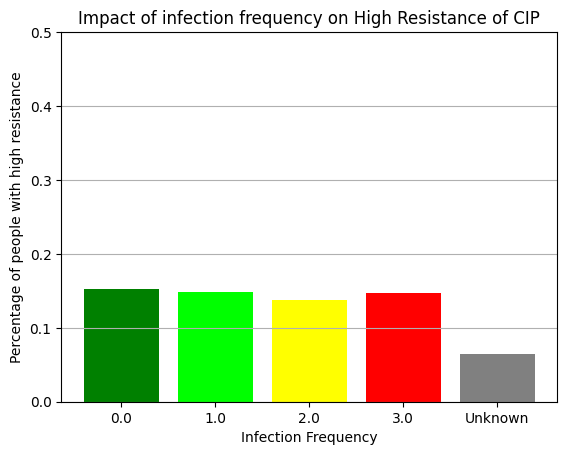

In [23]:
import matplotlib.pyplot as plt

plt.title("Impact of infection frequency on High Resistance of CIP")
plt.bar(grouped_cip["Infection_Freq"], grouped_cip["CIP High Resistance"], color=["green", "lime", "yellow", "red", "gray"])
plt.ylim(0.0, 0.5)
plt.grid(True, axis='y')
plt.xlabel("Infection Frequency")
plt.ylabel("Percentage of people with high resistance")
plt.show()

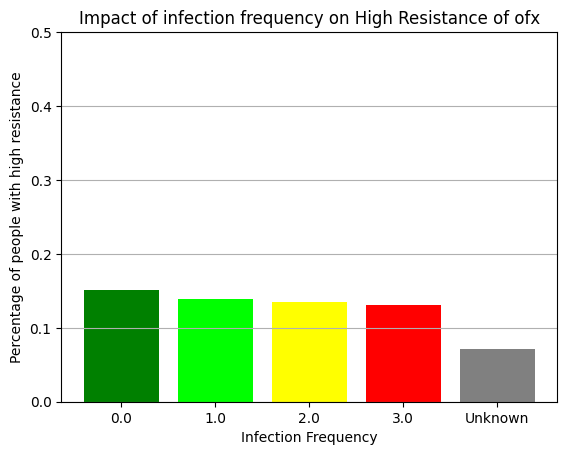

In [24]:
plt.title("Impact of infection frequency on High Resistance of ofx")
plt.bar(grouped_ofx["Infection_Freq"], grouped_ofx["ofx High Resistance"], color=["green", "lime", "yellow", "red", "gray"])
plt.ylim(0.0, 0.5)
plt.grid(True, axis='y')
plt.xlabel("Infection Frequency")
plt.ylabel("Percentage of people with high resistance")
plt.show()

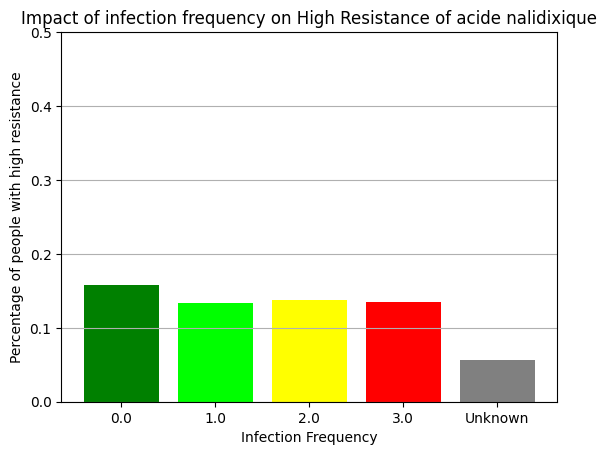

In [25]:
plt.title("Impact of infection frequency on High Resistance of acide nalidixique")
plt.bar(grouped_ofx["Infection_Freq"], grouped_acide_nalidixique["Acide nalidixique High Resistance"], color=["green", "lime", "yellow", "red", "gray"])
plt.ylim(0.0, 0.5)
plt.grid(True, axis='y')
plt.xlabel("Infection Frequency")
plt.ylabel("Percentage of people with high resistance")
plt.show()